# Интерполирование с равноудалёнными узлами


In [269]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sinh
from IPython.display import display, Latex


def newton_polynomial(x: float, nodes_x: list, nodes_f: list) -> float:
    if len(nodes_x) != len(nodes_f):
        return None

    h = nodes_x[1] - nodes_x[0]  # step between equidistant interpolation nodes
    polynomial = 0

    if x < nodes_x[round(len(nodes_x) / 1.5)]:  # checks if x is at the beginning of the table
        t = (x - nodes_x[0]) / h
        factor = 1
        for i in range(len(nodes_x)):
            polynomial += finite_differences(0, nodes_f, order=i) * factor
            factor *= (t - i) / (i + 1)
    elif x < nodes_x[round(len(nodes_x) / 1.5)]:  # checks if x is at the center of the table
        n = 0
        for i in range(int(len(nodes_x) / 3), len(nodes_x)):  # finding n -- closest node's number
            if nodes_x[i] > x:
                n = i if nodes_x[i] - x < x - nodes_x[i - 1] else i - 1
                break
        t = (x - nodes_x[n]) / h
        factor = 1
        for i in range(len(nodes_x)):
            k = round(i / 2)
            polynomial += finite_differences(n - k, nodes_f, order=i) * factor
            factor *= t + k if i % 2 == 0 else t - k
            factor /= i + 1
    else:  # x is at the end of the table
        t = (x - nodes_x[-1]) / h
        n = len(nodes_x)
        factor = 1
        for i in range(n):
            polynomial += finite_differences(n - i - 1, nodes_f, order=i) * factor
            factor *= (t + i) / (i + 1)

    return polynomial


def finite_differences(node_number: int, nodes_y: list, order=1) -> float:
    if order == 0:
        return nodes_y[node_number]  # if order of finite difference equals 0 => return function value
    if order == 1:
        return nodes_y[node_number + 1] - nodes_y[node_number]
    return finite_differences(node_number + 1, nodes_y, order=order - 1) \
           - finite_differences(node_number, nodes_y, order=order - 1)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

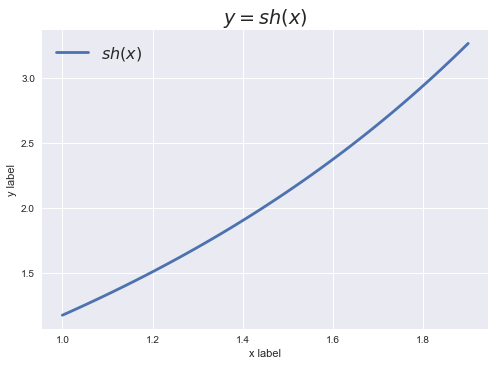

In [270]:
x_nodes = tuple(x / 10 for x in range(10,19))
f_nodes = (1.17520, 1.33565, 1.50946, 1.69838, 1.90430,
           2.12928, 2.37557, 2.64563, 2.94217)
x = (1.01, 1.02, 1.03, 1.11, 1.12, 1.13, 1.41, 1.42, 1.43, 1.44,
     1.45, 1.46, 1.75, 1.73, 1.77, 1.78, 1.79)


display(Latex("Найти значения $sh(x)$ для значений аргумента:"))
display(Latex("1) 1.01, 1.02, 1.03, 1.11, 1.12, 1.13"))
display(Latex("2) 1.41, 1.42, 1.43, 1.44"))
display(Latex("3) 1.45, 1.46, 1.75, 1.73, 1.77, 1.78, 1.79"))
display(Latex("При этом дана таблица значений $x_i$ и $f_i=f(x_i)$:"))
display(Latex("$i=0,\ldots,8;$"))
display(Latex("$x_i\in\{1.0,\, 1.1,\, 1.2,\, 1.3,\, 1.4,\, 1.5,\, 1.6,\, 1.7,\, 1.8\};$"))
display(Latex("$f_i\in\{1.17520,\, 1.33565,\, 1.50946,\, 1.69838,\, 1.90430,\, \
           2.12928,\, 2.37557,\, 2.64563,\, 2.94217\};$"))

display(Latex("Ответы:"))

section = 1
for i, q in enumerate(x):
    if i == 0 or i == 6 or i == 10:
        display(Latex(f"{section}."))
        section += 1
    display(Latex(f"$P_{len(x_nodes)} ({q}) = %.4f$"%
                  newton_polynomial(q, x_nodes, f_nodes)))



l = np.linspace(1, 1.9)
fig, ax = plt.subplots()  # Create a figure and an axes.
plt.style.use('seaborn-poster')
ax.plot(l, sinh(l), label="$sh(x)$")# Plot some data on the axes.
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("$y=sh(x)$")
ax.legend()